<a href="https://colab.research.google.com/github/rajendran-official/AI_ML_COURSE_ICT/blob/Preprocessing/Manappuram_Preprocessing_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NumPy is used for numerical, an extension easy to use machine learning framework for numerous industries

Scikit learn

TensorFLow--> Keras(lit version)


Data flow:
Data collection & storage --> Data preparation--> Explore & visualization--> experimentation and prediction

In [1]:
print ("hello world")

hello world


Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Data

In [3]:
#reading data from the google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# path to the file we are exploring
filepath = '/content/drive/MyDrive/Manappuram/Data/churn-data-v2.csv'
df_chrun = pd.read_csv(filepath)
df_chrun.head()


,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


Explore the Data

In [7]:
#columns
df_chrun.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [9]:
# size of the data
df_chrun.shape

(14999, 10)

In [10]:
df_chrun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [12]:
# statistical description of the data
df_chrun.describe()

,satisfaction,evaluation,average_montly_hours
count,14990.000000,14936.000000,14973.000000
mean,0.612817,716.085297,201.050424
std,0.248704,171.529563,49.986445
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


Pre processing

In [13]:
#Handling  Null values/ Missing Values

In [17]:
#check whether there are missing values
df_chrun.isna().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [18]:
df_chrun.isnull().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [21]:
#percentage of missing values in a column
(df_chrun.isna().sum()/len(df_chrun)) * 100

# if the percentage of missing values are higher than 10%
# higher than 10%  we delete that column

,0
satisfaction,0.060004
evaluation,0.420028
number_of_projects,0.293353
average_montly_hours,0.173345
time_spend_company,0.000000
work_accident,0.000000
churn,0.000000
promotion,0.000000
department,0.273352
salary,0.000000


In [23]:
df_chrun.dtypes

,0
satisfaction,float64
evaluation,float64
number_of_projects,object
average_montly_hours,float64
time_spend_company,object
work_accident,object
churn,object
promotion,object
department,object
salary,object


In [24]:
#chrun meaning whether the  person is retained or not


In [26]:
# Hanling missing values
# Option1= remove the entire column where values are missing
# Option2= Replace the missing value with central tendency values(mean/Median/mode)
# for Option2,
# for numerical columns...mean or median
## for categorical value ... mode

In [27]:
df_chrun['number_of_projects'].unique()

array(['two', 'five', 'seven', 'six', 'four', 'three', nan], dtype=object)

In [28]:
df_chrun['number_of_projects'].value_counts()

,count
number_of_projects,
four,4321
three,4055
five,2761
two,2388
six,1174
seven,256


In [29]:
# replace the null values with value mentioned
df_chrun['number_of_projects'].fillna('one')

,number_of_projects
0,two
1,five
2,seven
3,five
4,two
...,...
14994,two
14995,two
14996,two
14997,six


In [30]:
#Check for null values
df_chrun['number_of_projects'].isna()

,number_of_projects
0,False
1,False
2,False
3,False
4,False
...,...
14994,False
14995,False
14996,False
14997,False


In [31]:
# replace the null values with value mentioned
df_chrun['number_of_projects'] = df_chrun['number_of_projects'].fillna('one')

In [32]:
df_chrun['number_of_projects'].isna().sum()

np.int64(0)

In [33]:
df_chrun['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', nan], dtype=object)

In [39]:
df_chrun['department'].value_counts()

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [36]:
df_chrun['department'].mode(0)

,department
0,sales


In [37]:
# Replacing the missing value with mode of the column
# because it is carrying categorical values
df_chrun['department']= df_chrun['department'].fillna(df_chrun['department'].mode()[0])

In [40]:
df_chrun['department'].value_counts()

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [41]:
df_chrun['satisfaction'].isnull().sum()

np.int64(9)

In [42]:
df_chrun['satisfaction'].dtype

dtype('float64')

In [43]:
# we use plots to understand the distribution and
# then we decide whether to user mean or median
# normal/uniform distribution - mean
# skewed distrubution - median
# plotting histogram

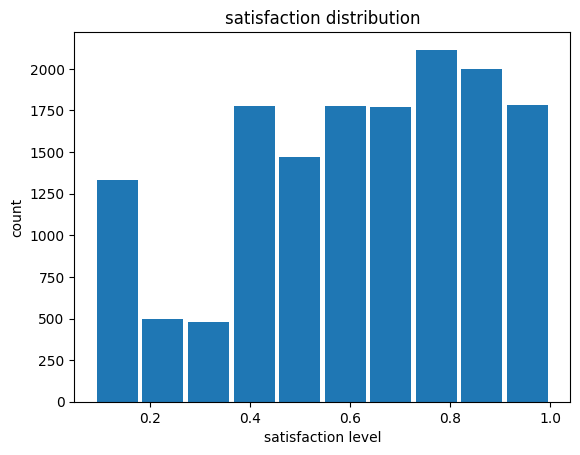

In [51]:
plt.hist(df_chrun['satisfaction'], rwidth=0.9)
plt.title('satisfaction distribution')
plt.xlabel('satisfaction level')
plt.ylabel('count')
plt.show()

In [47]:
# this is a skewed distribution, we use median to replace null values

In [56]:
df_chrun['satisfaction'] = df_chrun['satisfaction'].fillna(df_chrun['satisfaction'].median())

In [50]:
df_chrun.isna().sum()

,0
satisfaction,0
evaluation,63
number_of_projects,0
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,0
salary,0


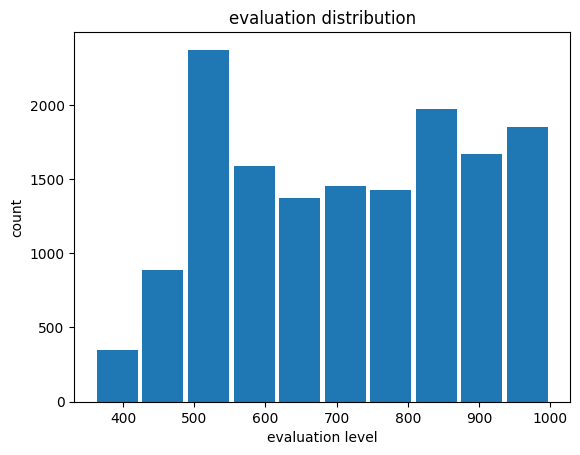

In [53]:
plt.hist(df_chrun['evaluation'], rwidth=0.9)
plt.title('evaluation distribution')
plt.xlabel('evaluation level')
plt.ylabel('count')
plt.show()

In [55]:
#Removing the rows with null values
df_churn = df_chrun.dropna()
df_chrun.isna().sum()

,0
satisfaction,0
evaluation,63
number_of_projects,0
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,0
salary,0


In [57]:
# Remove rows with null values in 'evaluation' or 'average_montly_hours' columns
df_chrun = df_chrun.dropna(subset=['evaluation', 'average_montly_hours'])

# Display the sum of null values after removal to confirm
df_chrun.isna().sum()

,0
satisfaction,0
evaluation,0
number_of_projects,0
average_montly_hours,0
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,0
salary,0


In [58]:
print('Categorical Columns and their unique values:')
for col in df_chrun.select_dtypes(include='object').columns:
    print(f"\nColumn '{col}':")
    print(df_chrun[col].unique())

Categorical Columns and their unique values:

Column 'number_of_projects':
['two' 'five' 'seven' 'six' 'four' 'three' 'one']

Column 'time_spend_company':
['3+' '6+' '4+' '5+' '2+' '8+' '10+' '7+']

Column 'work_accident':
['no' 'yes']

Column 'churn':
['yes' 'no']

Column 'promotion':
['no' 'yes']

Column 'department':
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

Column 'salary':
['low' 'medium' 'high']


In [59]:
df_chrun.shape

(14910, 10)